u.shape:(1002, 564),s.shape:(564,),v.shape:(564, 564)
variance Explained by Top 20 singular values:
[9.28983e-01 3.19110e-02 8.47300e-03 5.69500e-03 3.95800e-03 3.14900e-03
 2.66200e-03 2.04000e-03 1.60400e-03 9.33000e-04 7.85000e-04 6.83000e-04
 5.93000e-04 5.44000e-04 4.30000e-04 3.83000e-04 3.16000e-04 3.12000e-04
 2.68000e-04 2.52000e-04]


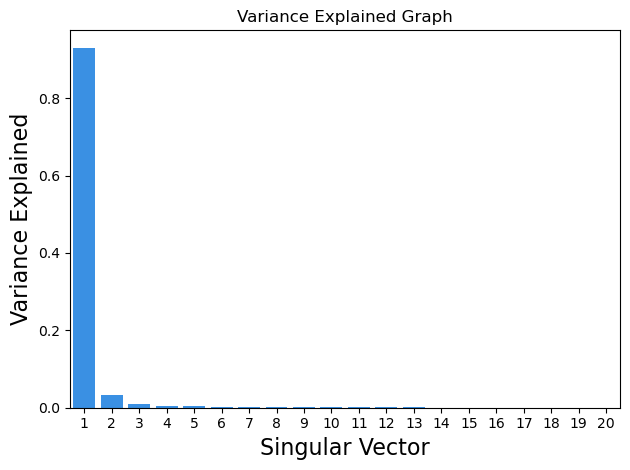

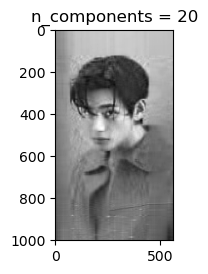

In [1]:
# import module
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
 

# assign and open image
url = 'https://i.pinimg.com/564x/53/74/a8/5374a8985353520935e2948b4269dbb3.jpg'
response = requests.get(url, stream=True)

with open('image.jpg', 'wb') as f:
    f.write(response.content)
 
    img = cv2.imread('image.jpg')


# Converting the image into gray scale for faster
# computation.
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
# Calculating the SVD
u, s, v = np.linalg.svd(gray_image, full_matrices=False)
 
# inspect shapes of the matrices
print(f'u.shape:{u.shape},s.shape:{s.shape},v.shape:{v.shape}')
 
 

 
# import module
import seaborn as sns
 
var_explained = np.round(s**2/np.sum(s**2), decimals=6)
 
# Variance explained top Singular vectors
print(f'variance Explained by Top 20 singular values:\n{var_explained[0:20]}')
 
sns.barplot(x=list(range(1, 21)),
y=var_explained[0:20], color="dodgerblue")
 
plt.title('Variance Explained Graph')
plt.xlabel('Singular Vector', fontsize=16)
plt.ylabel('Variance Explained', fontsize=16)
plt.tight_layout()
plt.show()
 

 
 
# plot images with different number of components
comps = [3648, 1, 5, 10, 15, 20]
plt.figure(figsize=(12, 6))
 
for i in range(len(comps)):
    low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ v[:comps[i], :]
 
if(i == 0):
    plt.subplot(2, 3, i+1),
    plt.imshow(low_rank, cmap='gray'),
    plt.title(f'Actual Image with n_components = {comps[i]}')
 
else:
    plt.subplot(2, 3, i+1),
    plt.imshow(low_rank, cmap='gray'),
    plt.title(f'n_components = {comps[i]}')